In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
raw_file = Path.cwd() / 'datasets/raw_data.csv'

In [3]:
df = pd.read_csv(raw_file)

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [14]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [18]:
sns.histplot(df.age[df.stroke==1])

TypeError: 'Series' object is not callable

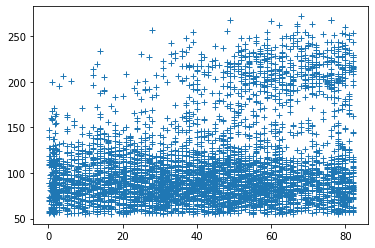

In [10]:
plt.plot(df.age, df.avg_glucose_level, '+')

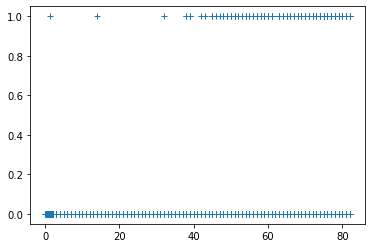

In [11]:
plt.plot(df.age, df.stroke, '+')

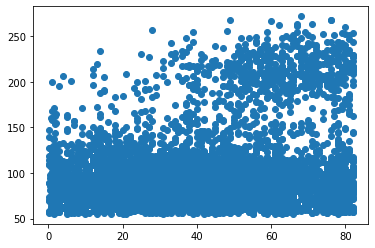

In [13]:
plt.scatter(x=df.age, y=df.avg_glucose_level)

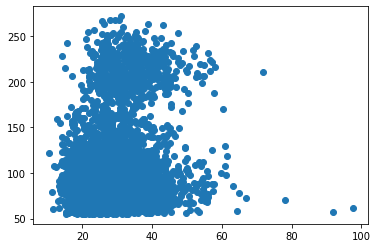

In [16]:
plt.scatter(x=df.bmi, y=df.avg_glucose_level, label=True)

<AxesSubplot:>

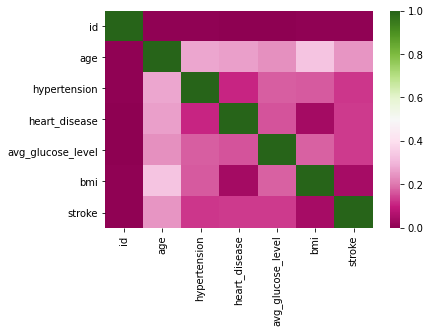

In [22]:
sns.heatmap(df.corr(),cmap='PiYG')

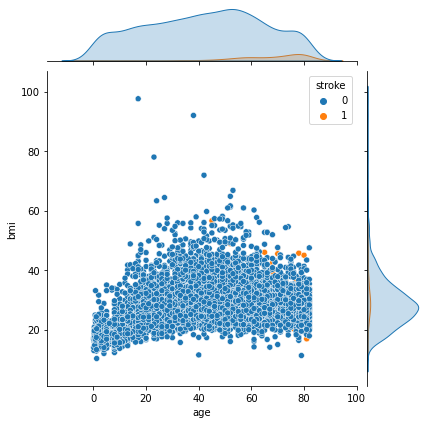

In [26]:
sns.jointplot(data=df, x='age', y='bmi', hue='stroke' )

/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

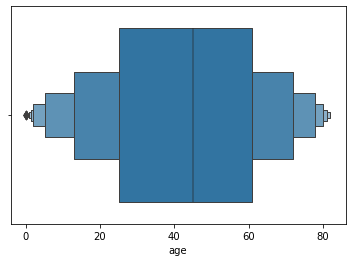

In [27]:
sns.boxenplot(df['age'])

/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

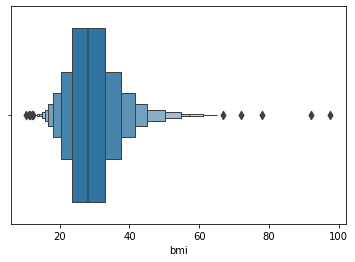

In [31]:
sns.boxenplot(df['bmi'])

/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

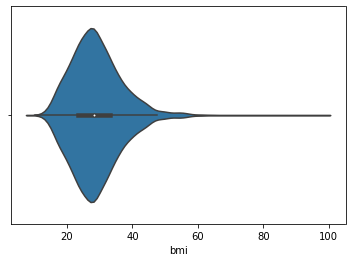

In [33]:
sns.violinplot(df['bmi'], split=True)

In [89]:
thing=pd.pivot_table(data=df, index='hypertension',columns= 'heart_disease',values='stroke',aggfunc='sum')

In [75]:
row=pd.pivot_table(data=df, index='hypertension',values='stroke',aggfunc=lambda x: x.sum())

In [90]:
thing

heart_disease,0,1
hypertension,,
0,149,34
1,53,13


In [92]:
row.values

array([[183],
       [ 66]])

In [80]:
thing/row.values

heart_disease,0,1
hypertension,,
0,0.814208,0.185792
1,0.803030,0.196970


In [97]:
column=pd.pivot_table(data=df,columns= 'heart_disease',values='stroke',aggfunc=lambda x: x.sum())

In [98]:
column

heart_disease,0,1
stroke,202,47


In [99]:
thing/column.values

heart_disease,0,1
hypertension,,
0,0.737624,0.723404
1,0.262376,0.276596


In [101]:
thing2=pd.pivot_table(data=df, index='hypertension',columns= 'heart_disease',values='stroke',aggfunc='sum', margins=True)

In [104]:
thing2

heart_disease,0,1,All
hypertension,,,
0,149,34,183
1,53,13,66
All,202,47,249


In [127]:
(pd.crosstab(df.heart_disease, df.hypertension, normalize='index', margins=True)*100).round(2).astype(str)+'%'

hypertension,0,1
heart_disease,,
0,91.02%,8.98%
1,76.81%,23.19%
All,90.25%,9.75%


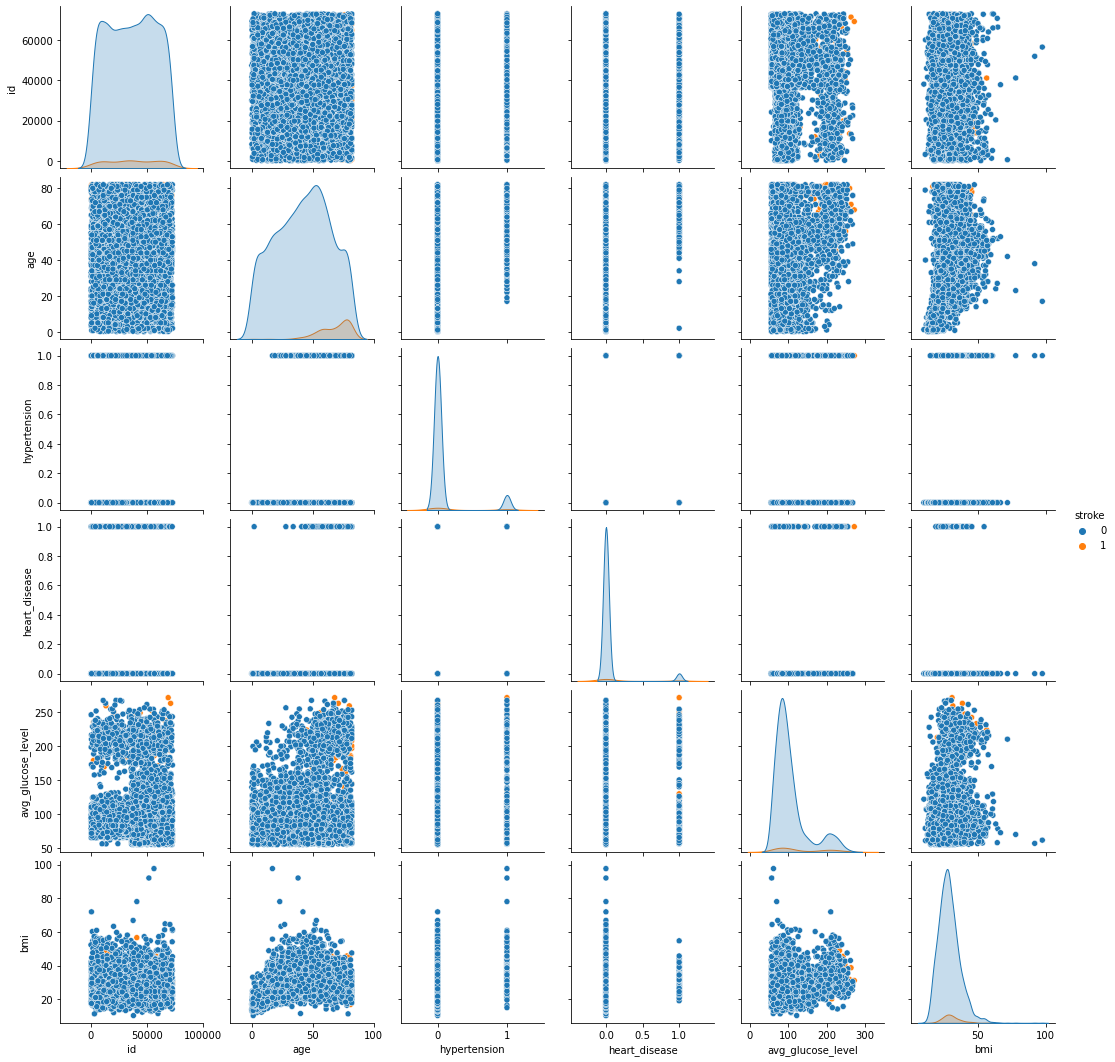

In [35]:
sns.pairplot(df, hue='stroke')

<AxesSubplot:xlabel='hypertension', ylabel='Count'>

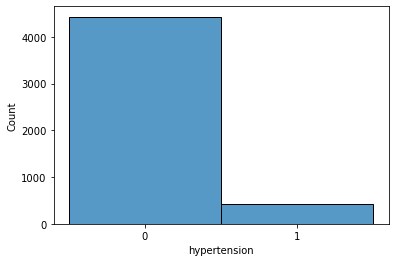

In [129]:
sns.histplot(df.hypertension.astype('str')[df.stroke==0])

<AxesSubplot:xlabel='hypertension', ylabel='Count'>

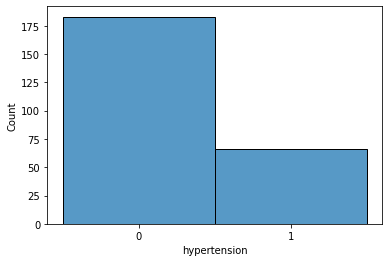

In [132]:
sns.histplot(df.hypertension.astype('str')[df.stroke==1])

<AxesSubplot:xlabel='heart_disease', ylabel='Count'>

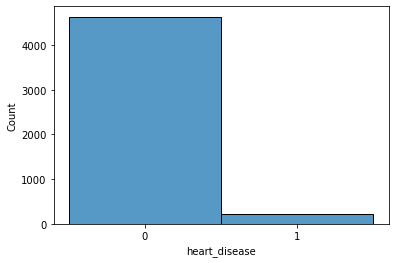

In [130]:
sns.histplot(df.heart_disease.astype('str')[df.stroke==0])

<AxesSubplot:xlabel='heart_disease', ylabel='Count'>

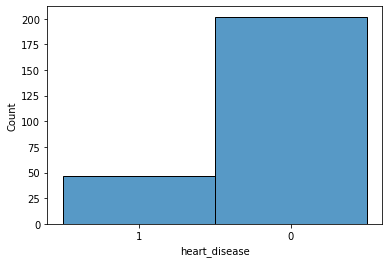

In [131]:
sns.histplot(df.heart_disease.astype('str')[df.stroke==1]) 

<AxesSubplot:xlabel='ever_married', ylabel='Count'>

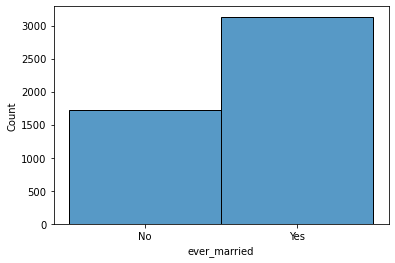

In [133]:
sns.histplot(df.ever_married[df.stroke==0])

<AxesSubplot:xlabel='ever_married', ylabel='Count'>

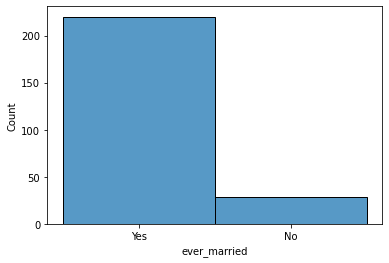

In [134]:
sns.histplot(df.ever_married[df.stroke==1])

<AxesSubplot:xlabel='work_type', ylabel='Count'>

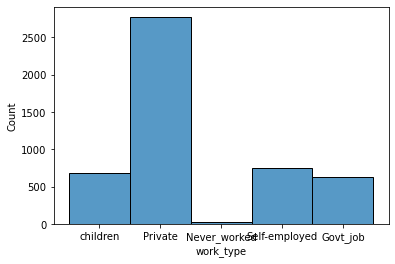

In [135]:
sns.histplot(df.work_type[df.stroke==0])

<AxesSubplot:xlabel='work_type', ylabel='Count'>

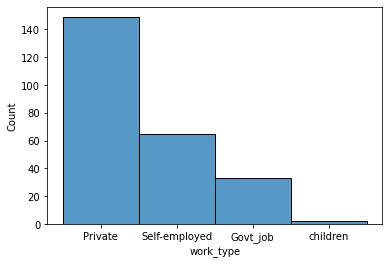

In [136]:
sns.histplot(df.work_type[df.stroke==1])

<AxesSubplot:xlabel='Residence_type', ylabel='Count'>

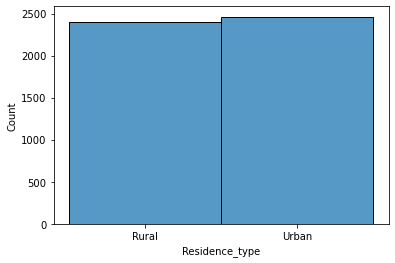

In [137]:
sns.histplot(df.Residence_type[df.stroke==0])

<AxesSubplot:xlabel='Residence_type', ylabel='Count'>

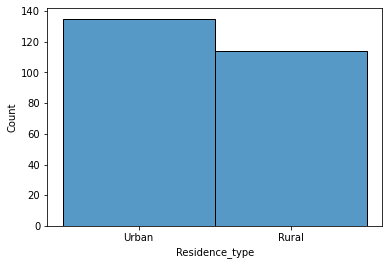

In [138]:
sns.histplot(df.Residence_type[df.stroke==1])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

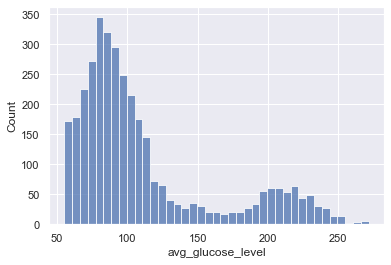

In [182]:
sns.histplot(df.loc[df.age>30, 'avg_glucose_level'])

In [217]:
from sklearn.linear_model import LinearRegression

rf=LinearRegression()
rf.fit(df.dropna().drop(['avg_glucose_level','ypred','id','age_bin','stroke'], axis=1)._get_numeric_data(), df.dropna().avg_glucose_level)
rf.score(df.dropna().drop(['avg_glucose_level','ypred','id','age_bin','stroke'], axis=1)._get_numeric_data(), df.dropna().avg_glucose_level)

0.08806646286694864

In [211]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(df.dropna().drop(['avg_glucose_level','ypred','id','age_bin','stroke'], axis=1)._get_numeric_data(), df.dropna().avg_glucose_level)
rf.score(df.dropna().drop(['avg_glucose_level','ypred','id','age_bin','stroke'], axis=1)._get_numeric_data(), df.dropna().avg_glucose_level)

0.7975057413747005

In [212]:
pd.Series(rf.feature_importances_, index=df.dropna().drop(['avg_glucose_level','ypred','id','age_bin','stroke'], axis=1)._get_numeric_data().columns)

age              0.392675
hypertension     0.029686
heart_disease    0.024283
bmi              0.553356
dtype: float64

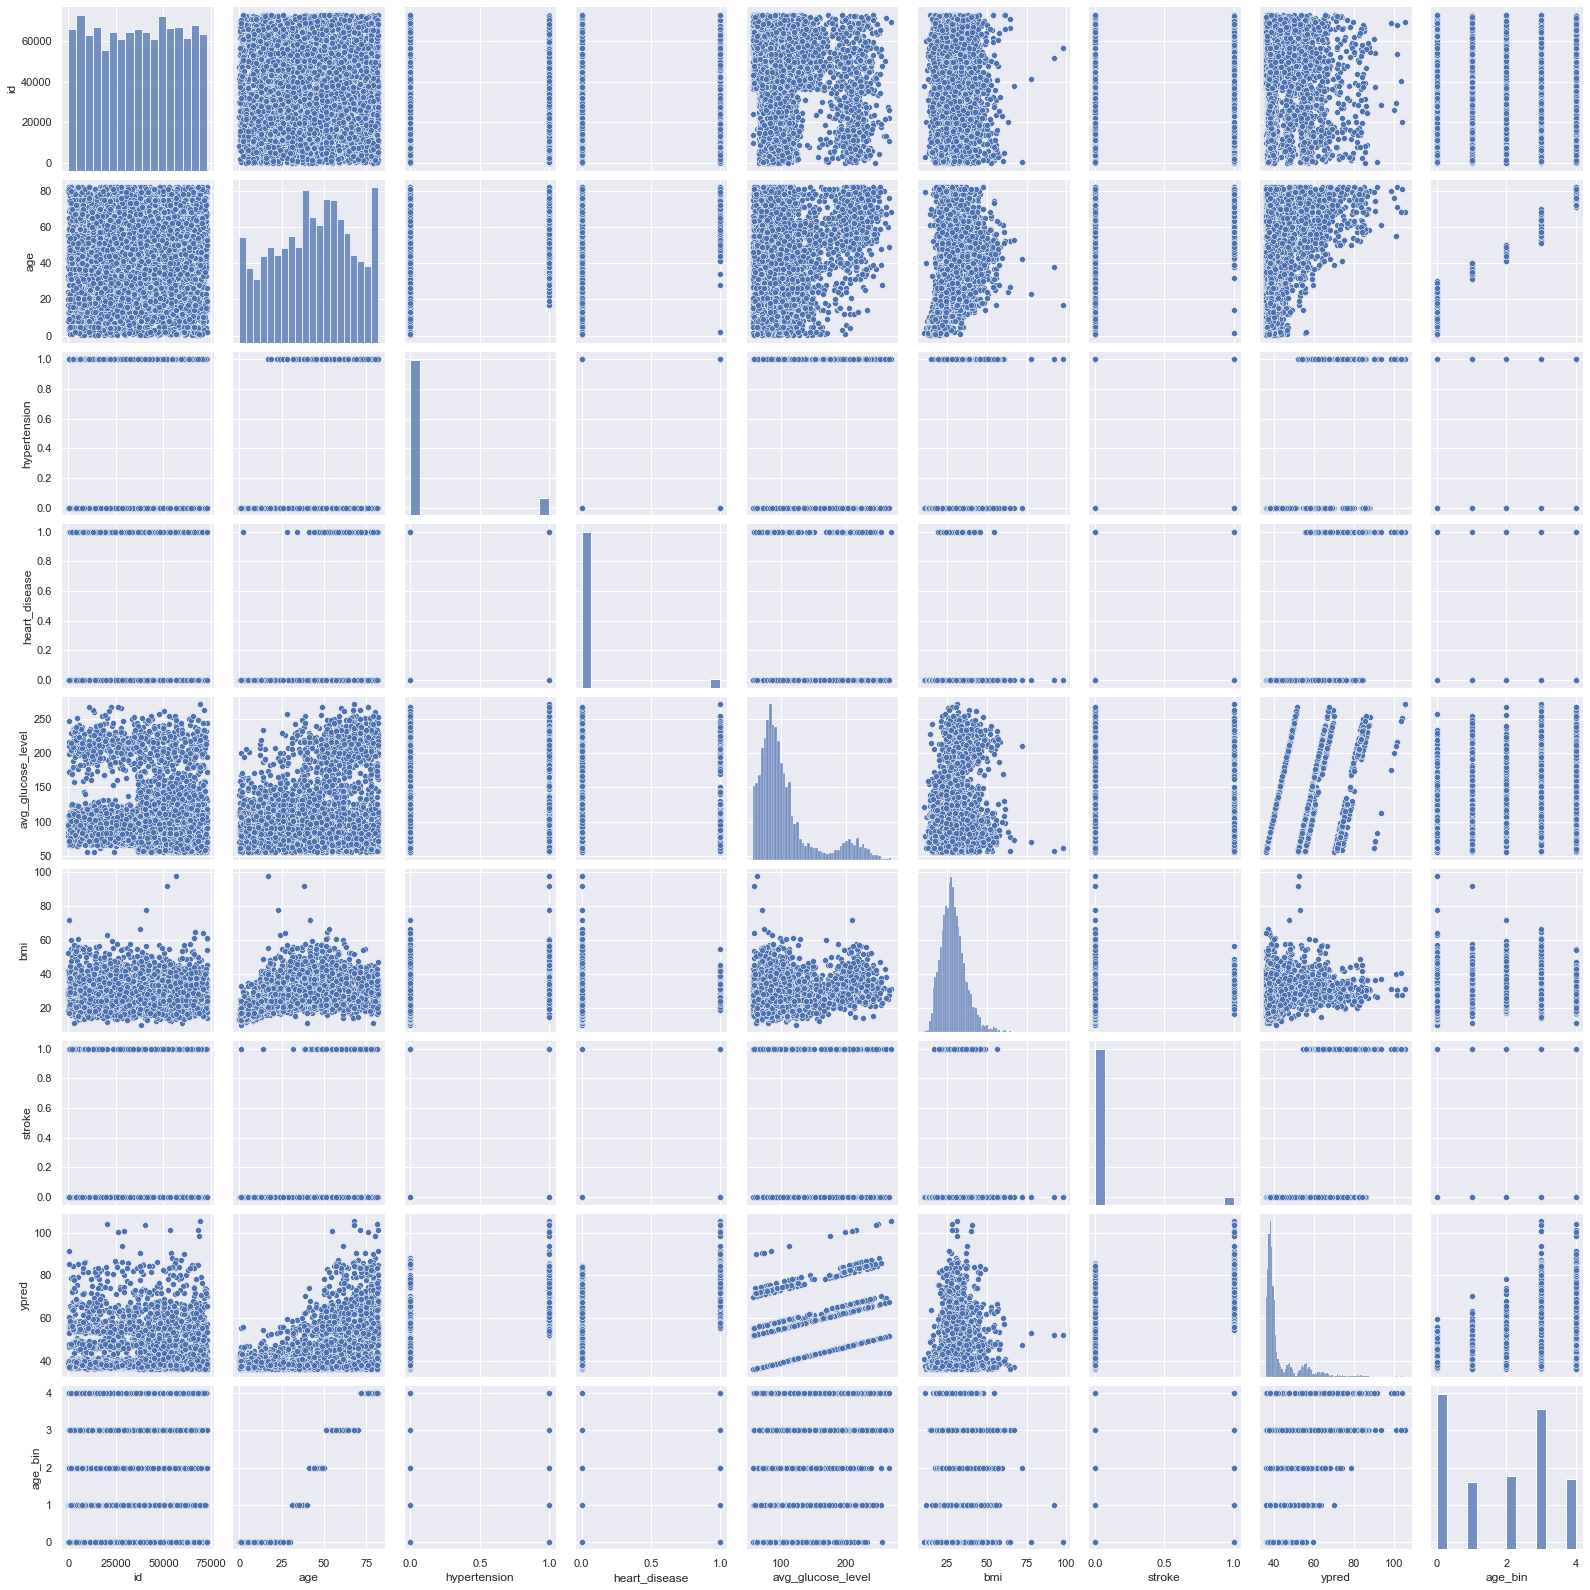

In [213]:
sns.pairplot(df)

In [203]:
y_pred=rf.predict(df.dropna().drop(['avg_glucose_level','ypred','id','age_bin','stroke'], axis=1)._get_numeric_data())

<AxesSubplot:>

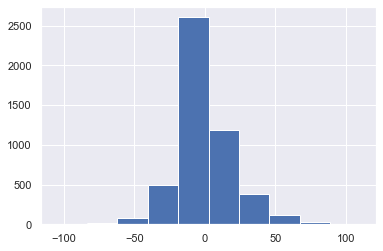

In [207]:
(df.dropna().avg_glucose_level-y_pred).hist()

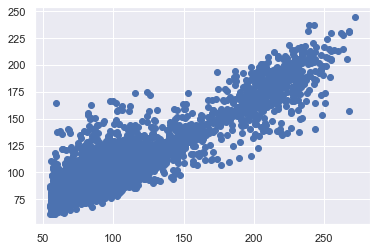

In [204]:
plt.scatter(df.dropna().avg_glucose_level, y_pred)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

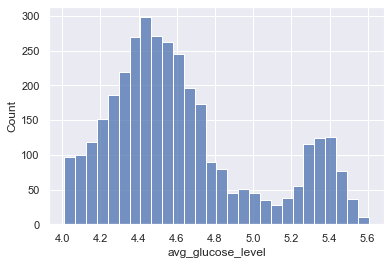

In [181]:
sns.histplot(np.log(df.loc[df.age>30, 'avg_glucose_level']))

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

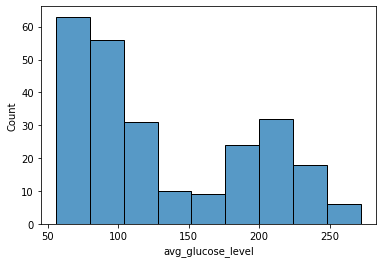

In [140]:
sns.histplot(df.avg_glucose_level[df.stroke==1])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

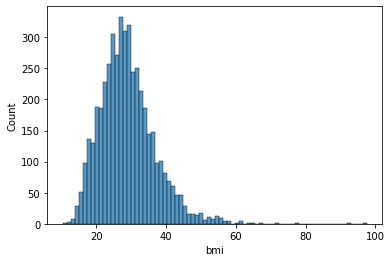

In [141]:
sns.histplot(df.bmi[df.stroke==0])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

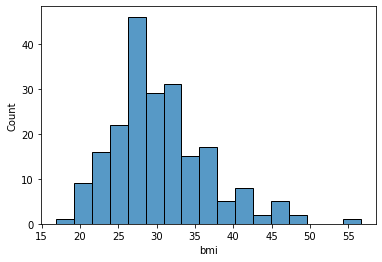

In [142]:
sns.histplot(df.bmi[df.stroke==1])

<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

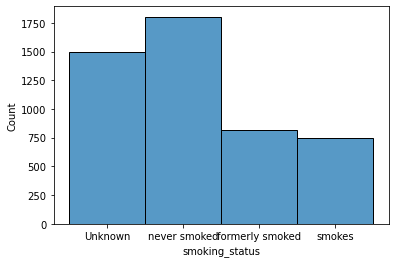

In [143]:
sns.histplot(df.smoking_status[df.stroke==0])

<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

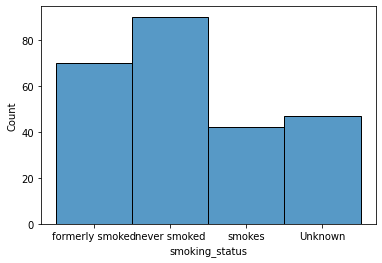

In [144]:
sns.histplot(df.smoking_status[df.stroke==1])

In [145]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [224]:
sub=df.loc[:,['id','age']].copy()
bins=[0,10,20,30,40,50,60,70,80,90]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
sub=df.groupby(pd.cut(df.age, bins=bins, labels=labels, precision=0))[['id','stroke']].agg({'id':'count','stroke':sum})
sub['stroke'] = (sub['stroke'] / sub['id'] * 100)



age_rep=px.bar(data_frame=sub, opacity=0.8)
age_rep

In [223]:
bins = [0,10,20,30,40,50,60,70,80,90]
labels = ['0 - 10','10 - 20','20 - 30','30 - 40','40 - 50','50 - 60','60 - 70','70 - 80','+ 90']
sub = (df.groupby(pd.cut(df.age,
                         bins=bins, 
                         labels=labels, 
                         precision=0))[['id', 'stroke']]
       .agg({'id':'count', 'stroke':'sum'}))
sub['stroke'] = (sub['stroke'] / sub['id'] * 100)
age_rep = px.bar(data_frame=sub,
                 opacity=0.8,
                 color='Stroke',
                 color_continuous_scale=px.colors.sequential.OrRd,
                 labels={'value':'Population Size', 'age': 'Age', 'stroke': 'Stroke (%)'},
                 width=1500, height=620)


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['id', 'stroke'] but received: Stroke

In [200]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [237]:
sub1

,id,stroke,gender
age,,,
0-50,2983,0.771036,2983
50-60,823,5.953827,823
60-70,594,8.249158,594
70-90,710,18.028169,710


In [240]:
sub1=df.loc[:,['gender','age']].copy()
bins=[0,50,60,70,90]
labels=['0-50','50-60','60-70','70-90']
propre=pd.cut(df.age, bins=bins, labels=labels, precision=0)
sub1=df.groupby(propre)[['id','stroke','gender']].agg({'id':'count','stroke':sum,'gender':'count'})
sub1['stroke'] = (sub1['stroke'] / sub1['id'] * 100)



sub1
age_rep=px.bar(data_frame=sub1, opacity=0.8)
age_rep

In [236]:
age_rep = px.bar(data_frame=sub1,
                 opacity=0.8,
                 color='stroke',
                 color_continuous_scale=px.colors.sequential.OrRd,
                 labels={'value':'Population Size', 'age': 'Age', 'stroke': 'Stroke (%)'},
                 width=1500, height=620)
age_rep

In [216]:
sub1=df.loc[:,['gender','age']].copy()
sub1


,gender,age
0,Male,67.0
1,Female,61.0
2,Male,80.0
3,Female,49.0
4,Female,79.0
...,...,...
5105,Female,80.0
5106,Female,81.0
5107,Female,35.0
5108,Male,51.0


df

In [185]:
test=df.groupby('Residence_type').apply(lambda x: x.avg_glucose_level.count())
test

Residence_type
Rural    2514
Urban    2596
dtype: int64

In [174]:
df.loc[test][df.stroke==1]

<ipython-input-174-121075c70b0c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[test][df.stroke==1]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
22,68794,Female,79.0,0,0,Yes,Self-employed,Urban,228.7,26.6,never smoked,1


## Assumpsions

In [5]:
sns.set()

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [14]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

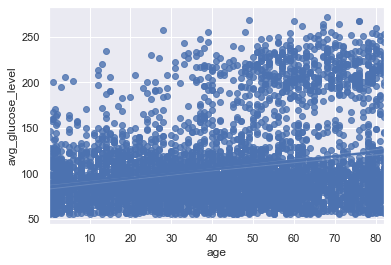

In [8]:
sns.regplot(data=df, x='age', y='avg_glucose_level')

<AxesSubplot:xlabel='age'>

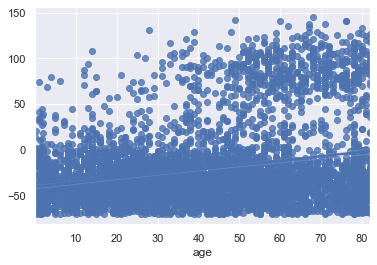

In [15]:
sns.regplot(data=df, x='age', y=df.eval('avg_glucose_level-126'))

In [98]:
df['age_bin']=pd.cut(df.age,[0,30,40,50,70,100]).cat.codes
#or we can do df['age_bin']=pd.cut(df.age,5).cat.codes as well

In [99]:
from statsmodels.formula.api import ols

In [414]:
model=ols('avg_glucose_level ~ C(age_bin)', data=df)

In [415]:
model_fit=model.fit()

In [416]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      avg_glucose_level   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     85.01
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           5.22e-70
Time:                        10:39:14   Log-Likelihood:                -26570.
No. Observations:                5110   AIC:                         5.315e+04
Df Residuals:                    5105   BIC:                         5.318e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          94.2588      1.107     85.146      0.000      92.089      96.429
C(age_bin)[T.1]     4.6794      2.020      2.317      0.021       0.719       8.639
C(age_bin)[T.2]     6.7524      1.957      3.451      0.001       2.916      10.589
C(age_bin)[T.3]    22.2155      1.607     13.822      0.000      19.065      25.366
C(age_bin)[T.4]    29.7592      1.984     15.001      0.000      25.870      33.648
==============================================================================
Omnibus:                     1008.493   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1729.413
Skew:                           1.303   Prob(JB):                         0.00
Kurtosis:                       4.152   Cond. No.                         5.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
df.corr().age.abs().sort_values()

id                   0.003538
avg_glucose_level    0.238171
stroke               0.245257
heart_disease        0.263796
hypertension         0.276398
bmi                  0.333398
ypred                0.431468
age_bin              0.920740
age                  1.000000
Name: age, dtype: float64

In [24]:
df.corr().avg_glucose_level

id                   0.001092
age                  0.238171
hypertension         0.174474
heart_disease        0.161857
avg_glucose_level    1.000000
bmi                  0.175502
stroke               0.131945
Name: avg_glucose_level, dtype: float64

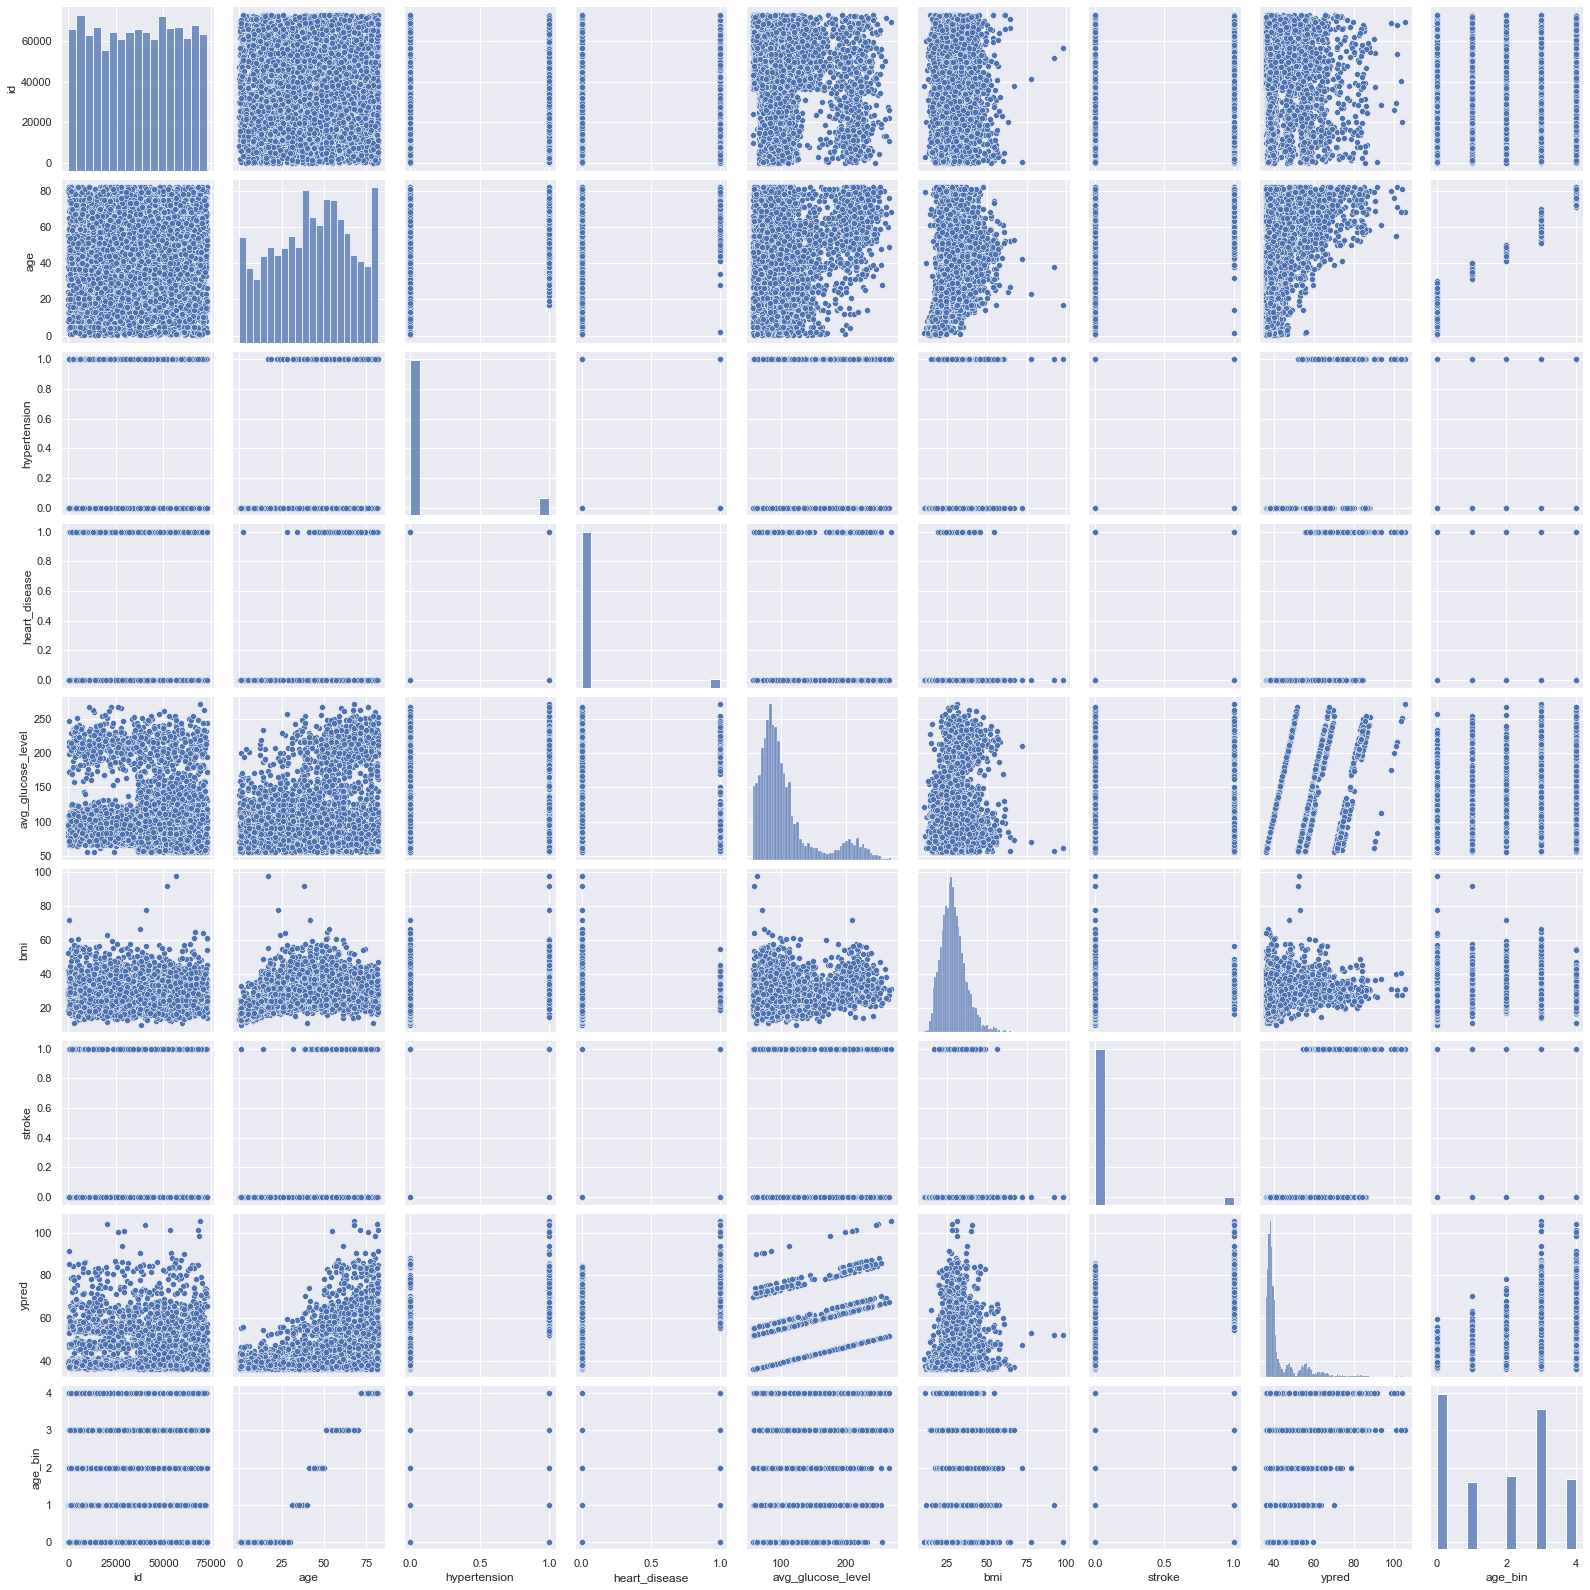

In [235]:
sns.pairplot(df)

<AxesSubplot:>

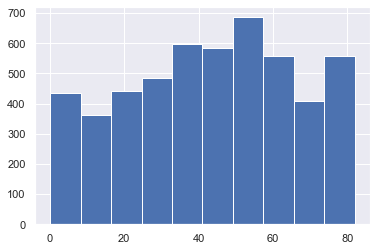

In [131]:
df.age.hist()

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

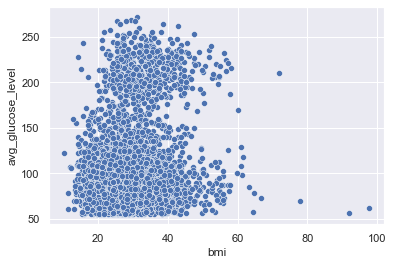

In [165]:
sns.scatterplot(data=df, x='bmi', y='avg_glucose_level')

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

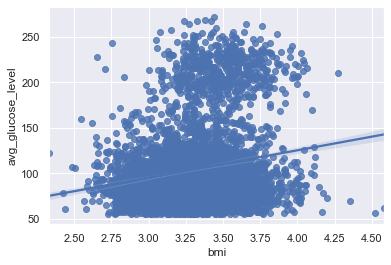

In [166]:
sns.regplot(data=df, x=np.log(df.bmi), y='avg_glucose_level')

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

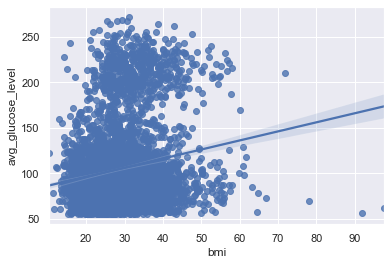

In [167]:
sns.regplot(data=df, x='bmi', y='avg_glucose_level')

In [ ]:
#actually doing log(bmi) makes more sense here

In [132]:
model=ols('avg_glucose_level ~ np.log(bmi) + hypertension + heart_disease + stroke +age ', data=df)

In [134]:
model_fit=model.fit()
model_fit.summary()
#the R-squared is better here than previously

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      avg_glucose_level   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     99.09
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          8.21e-100
Time:                        12:18:21   Log-Likelihood:                -25352.
No. Observations:                4909   AIC:                         5.072e+04
Df Residuals:                    4903   BIC:                         5.076e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        35.3763      7.928      4.462      0.000      19.835      50.918
np.log(bmi)      16.9084      2.502      6.757      0.000      12.003      21.814
hypertension     16.5754      2.192      7.562      0.000      12.278      20.873
heart_disease    19.1792      2.900      6.613      0.000      13.493      24.865
stroke           16.8100      3.103      5.418      0.000      10.727      22.893
age               0.2441      0.031      7.749      0.000       0.182       0.306
==============================================================================
Omnibus:                      969.054   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1698.204
Skew:                           1.274   Prob(JB):                         0.00
Kurtosis:                       4.347   Cond. No.                         667.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [141]:
#Now we want to compare the categorical values
pd.get_dummies(data=df, columns=['work_type','Residence_type','ever_married','smoking_status','gender'], drop_first=True)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ypred,age_bin,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,ever_married_Yes,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male,gender_Other
0,9046,67.0,0,1,228.69,36.6,1,86.376386,3,0,1,0,0,1,1,1,0,0,1,0
1,51676,61.0,0,0,202.21,NaN,1,65.010704,3,0,0,1,0,0,1,0,1,0,0,0
2,31112,80.0,0,1,105.92,32.5,1,77.319719,4,0,1,0,0,0,1,0,1,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,62.725328,2,0,1,0,0,1,1,0,0,1,0,0
4,1665,79.0,1,0,174.12,24.0,1,78.755640,4,0,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,53.915967,4,0,1,0,0,1,1,0,1,0,0,0
5106,44873,81.0,0,0,125.20,40.0,0,41.156589,4,0,0,1,0,1,1,0,1,0,0,0
5107,19723,35.0,0,0,82.99,30.6,0,38.042784,1,0,0,1,0,0,1,0,1,0,0,0
5108,37544,51.0,0,0,166.29,25.6,0,44.187774,3,0,1,0,0,0,1,1,0,0,1,0


In [236]:
model_fit

In [266]:
df.bmi.fillna(28.1, inplace=True)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  ypred              5110 non-null   float64
 13  age_bin            5110 non-null   int8   
dtypes: float64(4), int64(4), int8(1), object(5)
memory usage: 524.1+ KB


In [261]:
y_pred=model_fit.predict()
y_pred

array([116.47426253, 116.47426253, 124.01797183, ...,  98.93818991,
       116.47426253, 101.01116373])

In [408]:
df['ypred']=y_pred

<AxesSubplot:xlabel='avg_glucose_level', ylabel='ypred'>

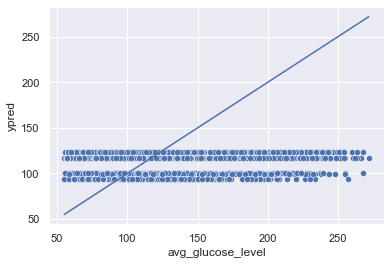

In [410]:
sns.scatterplot(data=df, x='avg_glucose_level', y='ypred')
sns.lineplot(data=df, x='avg_glucose_level', y='avg_glucose_level')

In [254]:
model_fit.resid.mean()

-9.343289351597686e-14

<AxesSubplot:>

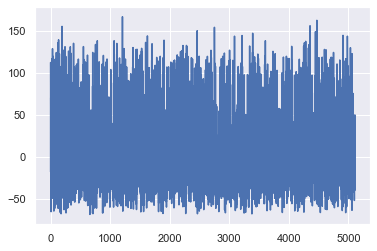

In [255]:
model_fit.resid.plot()

<AxesSubplot:>

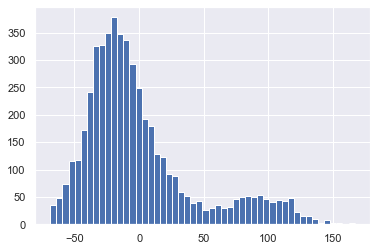

In [256]:
model_fit.resid.hist(bins=50)

/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

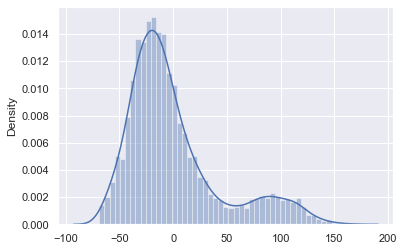

In [257]:
sns.distplot(model_fit.resid)

In [45]:
df.loc[df.bmi.isna()].shape

(201, 12)

In [233]:
from statsmodels.api import Probit, add_constant

In [234]:
Probit(df.stroke, add_constant(df).drop(['avg_glucose_level','ypred','id','age_bin','stroke', 'bmi'], axis=1)._get_numeric_data()).fit().summary()

Optimization terminated successfully.
         Current function value: 0.156639
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                         Probit   Df Residuals:                     5106
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Mar 2021   Pseudo R-squ.:                  0.1957
Time:                        16:36:06   Log-Likelihood:                -800.43
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 4.123e-84
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.5362      0.149    -23.803      0.000      -3.827      -3.245
age               0.0326      0.002     13.764      0.000       0.028       0.037
hypertension      0.2454      0.085      2.895      0.004       0.079       0.412
heart_disease     0.2417      0.101      2.390      0.017       0.044       0.440
=================================================================================
"""

In [315]:
from statsmodels.api import OLS
from statsmodels.formula.api import ols

In [407]:
OLS(df.avg_glucose_level, df._get_numeric_data().drop(['avg_glucose_level','id','age_bin'], axis=1)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      avg_glucose_level   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              5280.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):                        0.00
Time:                        10:27:07   Log-Likelihood:                         -26469.
No. Observations:                5110   AIC:                                  5.295e+04
Df Residuals:                    5104   BIC:                                  5.299e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
age              -0.1204      0.035     -3.427      0.001      -0.189      -0.052
hypertension     14.4910      2.120      6.836      0.000      10.335      18.647
heart_disease    19.4301      2.773      7.008      0.000      13.995      24.865
bmi               0.6998      0.079      8.826      0.000       0.544       0.855
stroke           13.5822      2.900      4.684      0.000       7.897      19.267
ypred             0.8294      0.026     31.555      0.000       0.778       0.881
==============================================================================
Omnibus:                      927.151   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1541.280
Skew:                           1.215   Prob(JB):                         0.00
Kurtosis:                       4.153   Cond. No.                         588.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [269]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(df._get_numeric_data().drop('avg_glucose_level', axis=1), df.avg_glucose_level)
model.coef_

array([ 2.51044770e-07, -8.18583116e-02,  1.43840817e+01,  1.92485995e+01,
        7.14044828e-01,  1.34142664e+01,  1.04091363e+00, -2.18093908e+00])

In [270]:
model.intercept_

-20.572602617038825

## Let's build a proper OLS model by cleaning the dataset first and testing all the assumptions and trying to make the best model possible

In [383]:
from statsmodels.api import add_constant

In [394]:
df2 = pd.read_csv('/Users/teahupoo20/Documents/GitHub/STROKE_PROJECT/datasets/raw_data.csv')
df2.drop(['id','smoking_status'], axis=1, inplace=True)
df2.bmi.fillna(28.1, inplace=True)
df2=pd.get_dummies(data=df2, columns=['Residence_type','gender','ever_married','work_type'], drop_first=True)

In [395]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hypertension             5110 non-null   int64  
 1   heart_disease            5110 non-null   int64  
 2   avg_glucose_level        5110 non-null   float64
 3   bmi                      5110 non-null   float64
 4   stroke                   5110 non-null   int64  
 5   Residence_type_Urban     5110 non-null   uint8  
 6   gender_Male              5110 non-null   uint8  
 7   gender_Other             5110 non-null   uint8  
 8   ever_married_Yes         5110 non-null   uint8  
 9   work_type_Never_worked   5110 non-null   uint8  
 10  work_type_Private        5110 non-null   uint8  
 11  work_type_Self-employed  5110 non-null   uint8  
 12  work_type_children       5110 non-null   uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 239.7 KB


In [398]:
X, y = add_constant(df2).drop('avg_glucose_level', axis=1), df2.avg_glucose_level # features, target
model_fit=OLS(y,X).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      avg_glucose_level   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     40.20
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           3.70e-91
Time:                        10:18:03   Log-Likelihood:                -26503.
No. Observations:                5110   AIC:                         5.303e+04
Df Residuals:                    5097   BIC:                         5.312e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      72.6655      3.397     21.391      0.000      66.006      79.325
hypertension               17.9464      2.112      8.496      0.000      13.806      22.087
heart_disease              24.1683      2.746      8.801      0.000      18.785      29.552
bmi                         0.7452      0.089      8.367      0.000       0.571       0.920
stroke                     18.5663      2.872      6.465      0.000      12.936      24.196
Residence_type_Urban       -0.5342      1.213     -0.440      0.660      -2.913       1.845
gender_Male                 4.0774      1.242      3.282      0.001       1.642       6.513
gender_Other               53.7317     43.365      1.239      0.215     -31.282     138.745
ever_married_Yes            8.3618      1.573      5.315      0.000       5.278      11.446
work_type_Never_worked      2.6670      9.486      0.281      0.779     -15.930      21.264
work_type_Private           0.2409      1.878      0.128      0.898      -3.441       3.923
work_type_Self-employed     2.0032      2.278      0.879      0.379      -2.462       6.469
work_type_children          4.7011      2.797      1.681      0.093      -0.783      10.185
==============================================================================
Omnibus:                     1025.344   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1812.846
Skew:                           1.289   Prob(JB):                         0.00
Kurtosis:                       4.368   Cond. No.                     2.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [405]:
columns_to_drop=['work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','Residence_type_Urban','gender_Other']
model_fit=OLS(y, X.drop(columns_to_drop, axis=1)).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      avg_glucose_level   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     79.33
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           3.67e-95
Time:                        10:25:06   Log-Likelihood:                -26507.
No. Observations:                5110   AIC:                         5.303e+04
Df Residuals:                    5103   BIC:                         5.307e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               75.9409      2.430     31.250      0.000      71.177      80.705
hypertension        18.0904      2.106      8.592      0.000      13.963      22.218
heart_disease       24.1078      2.740      8.800      0.000      18.737      29.479
bmi                  0.6866      0.084      8.163      0.000       0.522       0.852
stroke              18.4726      2.870      6.437      0.000      12.847      24.098
gender_Male          4.2515      1.237      3.437      0.001       1.827       6.676
ever_married_Yes     7.1093      1.376      5.168      0.000       4.412       9.806
==============================================================================
Omnibus:                     1024.249   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1807.178
Skew:                           1.289   Prob(JB):                         0.00
Kurtosis:                       4.356   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [417]:
import Assumptions

In [418]:
tester=Assumptions.Assumption_Tester_OLS(X, y)

Fitting linear regression

R^2: 0.08645517077143339 

Coefficients
-------------------------------------
Intercept: 72.66550829259296
const: 0.0
hypertension: 17.95
heart_disease: 24.17
bmi: 0.75
stroke: 18.57
Residence_type_Urban: -0.53
gender_Male: 4.08
gender_Other: 53.73
ever_married_Yes: 8.36
work_type_Never_worked: 2.67
work_type_Private: 0.24
work_type_Self-employed: 2.0
work_type_children: 4.7

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


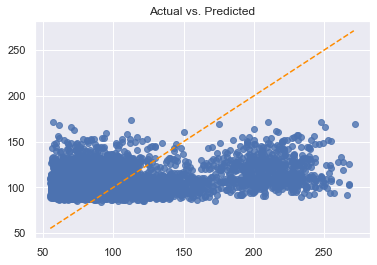

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with avg_glucose_level


bmi    0.166876
Name: avg_glucose_level, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with avg_glucose_level


Series([], Name: avg_glucose_level, dtype: float64)


Assumption 2: Little to no multicollinearity among predictors


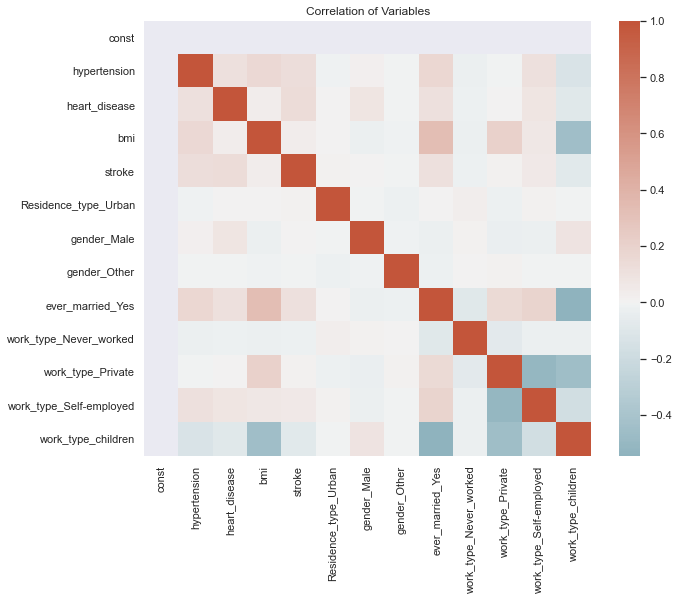

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
const: 31.403439819776413
work_type_children: 2.477965972252035
work_type_Private: 2.349222362324226
work_type_Self-employed: 1.900267115335633
ever_married_Yes: 1.519449769888932
bmi: 1.2794151886867906
hypertension: 1.0679582220206403
work_type_Never_worked: 1.049815719067863
heart_disease: 1.0485503769568865
stroke: 1.040362389541135
gender_Male: 1.0190219863108727
Residence_type_Urban: 1.0015336418635412
gender_Other: 1.0012818355824853

1 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the 

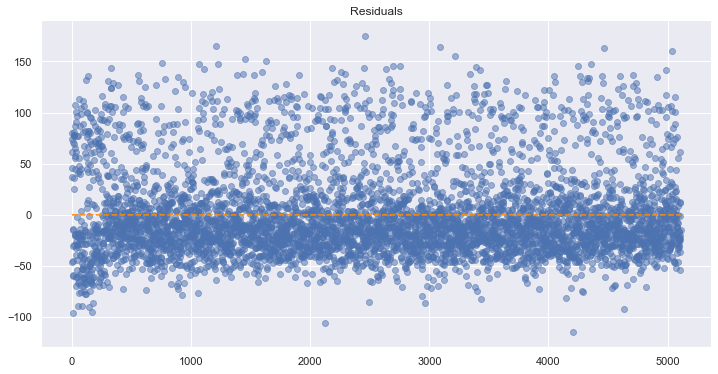

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 404.2322881284792,
 'pvalue for LM': 4.805307706617884e-79,
 'F stats': 36.486642540688855,
 'pvalue for Fstats': 1.753711790421731e-82}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


/Users/teahupoo20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


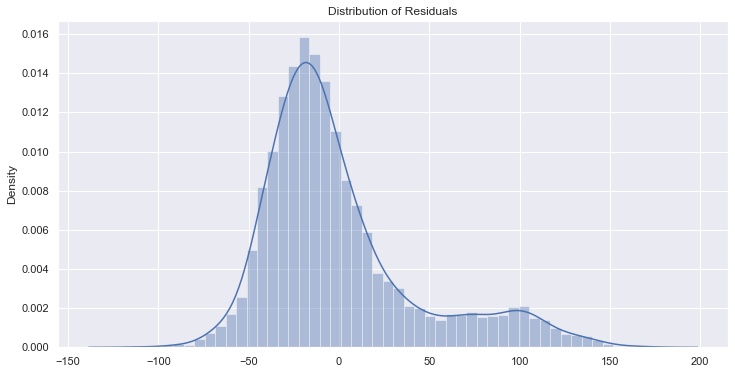


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


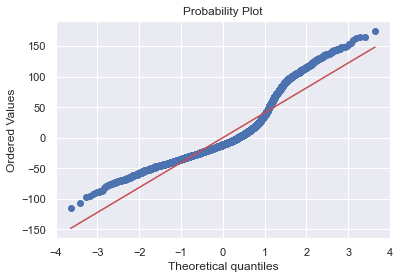

Assumption can be considered as satisfied.


{'Satisfied': ['Autocorrelation', 'Sub-Normality'],
 'Potentially': ['Multicollinearity', 'Autocorrelation'],
 'Violated': ['Linearity', 'Normality']}

In [419]:
tester.run_all()